# Logistic Regression Take Home Exercise
## st121411
Using the data from Example 2 above, finish the data cleaning and preparation. Build a logistic regression model based on the cleaned dataset and report the accuracy on the test and training sets.

In [1]:
# Import Pandas. You may need to run "pip3 install pandas" at the console if it's not already installed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import the data

data_train = pd.read_csv('train_LoanPrediction.csv')
data_test = pd.read_csv('test_LoanPrediction.csv')

# Start to explore the data

print('Training data shape', data_train.shape)
print('Test data shape', data_test.shape)

print('Training data:\n', data_train)


Training data shape (614, 13)
Test data shape (367, 12)
Training data:
       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amoun

In [2]:
# Check for missing values in the training and test data

print('Missing values for train data:\n------------------------\n', data_train.isnull().sum())
print('Missing values for test data \n ------------------------\n', data_test.isnull().sum())

Missing values for train data:
------------------------
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Missing values for test data 
 ------------------------
 Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [3]:
# Compute ratio of each category value
# Divide the missing values based on ratio
# Fillin the missing values
# Print the values before and after filling the missing values for confirmation

married = data_train['Married'].value_counts()
print(married)
print('Elements in Married variable', married.shape)
print('Married ratio ', married[0]/sum(married.values))

def fill_martial_status(data, yes_num_train, no_num_train):        
    data['Married'].fillna('Yes', inplace = True, limit = yes_num_train)
    data['Married'].fillna('No', inplace = True, limit = no_num_train)  

fill_martial_status(data_train, 2, 1)
print(data_train['Married'].value_counts()) 
print('Missing values for train data:\n------------------------\n', data_train.isnull().sum())

Yes    398
No     213
Name: Married, dtype: int64
Elements in Married variable (2,)
Married ratio  0.6513911620294599
Yes    400
No     214
Name: Married, dtype: int64
Missing values for train data:
------------------------
 Loan_ID               0
Gender               13
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [4]:
# Another example of filling in missing values for the "number of dependents" attribute.
# Here we see that categorical values are all numeric except one value "3+" 
# Create a new category value "4" for "3+" and ensure that all the data is numeric

print(data_train['Dependents'].value_counts())
dependent = data_train['Dependents'].value_counts()

print('Dependent ratio 1 ', dependent['0'] / sum(dependent.values))
print('Dependent ratio 2 ', dependent['1'] / sum(dependent.values))
print('Dependent ratio 3 ', dependent['2'] / sum(dependent.values))
print('Dependent ratio 3+ ', dependent['3+'] / sum(dependent.values))

def fill_dependent_status(num_0_train, num_1_train, num_2_train, num_3_train, num_0_test, num_1_test, num_2_test, num_3_test):        
    data_train['Dependents'].fillna('0', inplace=True, limit = num_0_train)
    data_train['Dependents'].fillna('1', inplace=True, limit = num_1_train)
    data_train['Dependents'].fillna('2', inplace=True, limit = num_2_train)
    data_train['Dependents'].fillna('3+', inplace=True, limit = num_3_train)
    data_test['Dependents'].fillna('0', inplace=True, limit = num_0_test)
    data_test['Dependents'].fillna('1', inplace=True, limit = num_1_test)
    data_test['Dependents'].fillna('2', inplace=True, limit = num_2_test)
    data_test['Dependents'].fillna('3+', inplace=True, limit = num_3_test)

fill_dependent_status(9, 2, 2, 2, 5, 2, 2, 1)

print(data_train['Dependents'].value_counts())

# Convert category value "3+" to "4"

data_train['Dependents'].replace('3+', 4, inplace = True)
data_test['Dependents'].replace('3+', 4, inplace = True)


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Dependent ratio 1  0.5759599332220368
Dependent ratio 2  0.17028380634390652
Dependent ratio 3  0.1686143572621035
Dependent ratio 3+  0.08514190317195326
0     354
1     104
2     103
3+     53
Name: Dependents, dtype: int64


In [5]:
print(data_train['LoanAmount'].value_counts())

LoanAmt = data_train['LoanAmount'].value_counts()

print('mean loan amount ', np.mean(data_train["LoanAmount"]))

loan_amount_mean = np.mean(data_train["LoanAmount"])

data_train['LoanAmount'].fillna(loan_amount_mean, inplace=True)
data_test['LoanAmount'].fillna(loan_amount_mean, inplace=True)

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64
mean loan amount  146.41216216216216


In [6]:
# Compute ratio of each category value
# Divide the missing values based on ratio
# Fillin the missing values
# Print the values before and after filling the missing values for confirmation

Gender = data_train['Gender'].value_counts()
print(Gender)
print('Elements in Gender variable', Gender.shape)
print('Gender ratio ', Gender[0]/sum(Gender.values))

def fill_gender_status(data, yes_num_train, no_num_train):        
    data['Gender'].fillna('Male', inplace = True, limit = yes_num_train)
    data['Gender'].fillna('Female', inplace = True, limit = no_num_train)  

fill_gender_status(data_train,11, 3)
fill_gender_status(data_test,11,3)

#data_train['Gender'].fillna(data_train['Gender'].mode()[0],inplace=True)
#data_test['Gender'].fillna(data_test['Gender'].mode()[0],inplace=True)

print(data_train['Gender'].value_counts()) 
print('Missing values for train data:\n------------------------\n', data_train.isnull().sum())
print('Missing values for test data:\n------------------------\n', data_test.isnull().sum())

Gender = data_train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64
Elements in Gender variable (2,)
Gender ratio  0.8136439267886856
Male      500
Female    114
Name: Gender, dtype: int64
Missing values for train data:
------------------------
 Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Missing values for test data:
------------------------
 Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [7]:
# Compute ratio of each category value
# Divide the missing values based on ratio
# Fillin the missing values
# Print the values before and after filling the missing values for confirmation

selfe = data_train['Self_Employed'].value_counts()
print(selfe)
print('Elements in self employed variable', selfe.shape)
print('self employed ratio ', selfe[0]/sum(selfe.values))

def fill_selfe_status(data, yes_num_train, no_num_train):        
    data['Self_Employed'].fillna('Yes', inplace = True, limit = yes_num_train)
    data['Self_Employed'].fillna('No', inplace = True, limit = no_num_train)  

fill_selfe_status(data_train, 6, 30)
fill_selfe_status(data_test,5,25)
#data_train['Self_Employed'].fillna(data_train['Self_Employed'].mode()[0],inplace=True)
#data_test['Self_Employed'].fillna(data_test['Self_Employed'].mode()[0],inplace=True)

print(data_train['Self_Employed'].value_counts()) 
print('Missing values for train data:\n------------------------\n', data_train.isnull().sum())
print('Missing values for test data:\n------------------------\n', data_test.isnull().sum())

No     500
Yes     82
Name: Self_Employed, dtype: int64
Elements in self employed variable (2,)
self employed ratio  0.8591065292096219
No     526
Yes     88
Name: Self_Employed, dtype: int64
Missing values for train data:
------------------------
 Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Missing values for test data:
------------------------
 Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [8]:
print(data_train['Loan_Amount_Term'].value_counts())

LoanAmt = data_train['Loan_Amount_Term'].value_counts()

print('mean loan amount term ', np.mean(data_train["Loan_Amount_Term"]))

loan_amount_term_mean = np.mean(data_train["Loan_Amount_Term"])

data_train['Loan_Amount_Term'].fillna(loan_amount_term_mean, inplace=True)
data_test['Loan_Amount_Term'].fillna(loan_amount_term_mean, inplace=True)
print('Missing values for train data:\n------------------------\n', data_train.isnull().sum())
print('Missing values for test data:\n------------------------\n', data_test.isnull().sum())

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
mean loan amount term  342.0
Missing values for train data:
------------------------
 Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Missing values for test data:
------------------------
 Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       29
Property_Area         0
dtype: int64


In [9]:
selfe = data_train['Credit_History'].value_counts()
print(selfe)
print('Elements in self employed variable', selfe.shape)
print('self employed ratio ', selfe[0]/sum(selfe.values))

def fill_credith_status(data, yes_num_train, no_num_train):        
    data['Credit_History'].fillna(1.0, inplace = True, limit = yes_num_train)
    data['Credit_History'].fillna(0.0, inplace = True, limit = no_num_train)  

fill_credith_status(data_train, 45, 9)
fill_credith_status(data_test,30,6)

#data_train['Credit_History'].fillna(data_train['Credit_History'].mode()[0],inplace=True)
#data_test['Credit_History'].fillna(data_test['Credit_History'].mode()[0],inplace=True)

print(data_train['Credit_History'].value_counts()) 
print('Missing values for train data:\n------------------------\n', data_train.isnull().sum())
print('Missing values for test data:\n------------------------\n', data_test.isnull().sum())

1.0    475
0.0     89
Name: Credit_History, dtype: int64
Elements in self employed variable (2,)
self employed ratio  0.15780141843971632
1.0    520
0.0     94
Name: Credit_History, dtype: int64
Missing values for train data:
------------------------
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Missing values for test data:
------------------------
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [10]:
#create design matrix X and y

X = data_train.iloc[:,1:-1].copy()

print(X.iloc[:10,1])

X.loc[X['Gender'] == 'Male', 'Gender'] = 0
X.loc[X['Gender'] == 'Female', 'Gender'] = 1
X.loc[X['Married'] == 'No', 'Married'] = 0
X.loc[X['Married'] == 'Yes', 'Married'] = 1
X.loc[X['Education'] == 'Graduate', 'Education'] = 1
X.loc[X['Education'] == 'Not Graduate', 'Education'] = 0
X.loc[X['Self_Employed'] == 'Yes', 'Self_Employed'] = 1
X.loc[X['Self_Employed'] == 'No', 'Self_Employed'] = 0
X.loc[X['Property_Area'] == 'Urban', 'Property_Area'] = 1
X.loc[X['Property_Area'] == 'Semiurban', 'Property_Area'] = 2
X.loc[X['Property_Area'] == 'Rural', 'Property_Area'] = 0

X_train = X.values.astype(float)


mean = np.mean(X_train,axis=0)
std = np.std(X_train,axis=0)

print(mean.shape)
print(std.shape)

X_train = (X_train-mean)/std

print(X_train[:10,1])
y = data_train['Loan_Status'].copy()

y[y == 'Y'] = 1
y[y == 'N']= 0

y_train = y.values.astype(float).reshape(-1,1)

ix = np.arange(X_train.shape[0])
np.random.shuffle(ix)
percentage = 0.7
ix_train = ix[:int(percentage*ix.size)]
ix_test = ix[int(percentage*ix.size):]
X_test = X_train[ix_test]
X_train = X_train[ix_train]
y_test = y_train[ix_test]
y_train = y_train[ix_train]

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

0     No
1    Yes
2    Yes
3    Yes
4     No
5    Yes
6    Yes
7    Yes
8    Yes
9    Yes
Name: Married, dtype: object
(11,)
(11,)
[-1.36717185  0.73143694  0.73143694  0.73143694 -1.36717185  0.73143694
  0.73143694  0.73143694  0.73143694  0.73143694]
(429, 11) (185, 11)
(429, 1) (185, 1)


In [11]:
m,n = X_train.shape

theta_initial = np.zeros((n+1, 1))

X_train = np.insert(X_train, 0, 1, axis=1)
X_test = np.insert(X_test,0,1,axis=1)
print(X_train.shape,X_test.shape)

(429, 12) (185, 12)


In [12]:
def sigmoid(z):   
    return 1 / (1 + np.exp(-z))

def h(X, theta):
    return sigmoid(X @ theta)

def grad_j(X, y, y_pred):
    return X.T @ (y - y_pred) / X.shape[0]
    
def j(theta, X, y):    
    y_pred = h(X, theta)
    error = (-y * np.log(y_pred)) - ((1 - y) * np.log(1 - y_pred))
    cost = sum(error) / X.shape[0]
    grad = grad_j(X, y, y_pred)
    return cost[0], grad

In [13]:
# Get a feel for how h works


print(X_train.shape)
print(y_train.shape)
print(theta_initial.shape)

print('Initial theta:', theta_initial)
print('Initial predictions:', h(X_train, theta_initial)[0:5,:])
print('Targets:', y_train[0:5])

(429, 12)
(429, 1)
(12, 1)
Initial theta: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Initial predictions: [[0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]]
Targets: [[1.]
 [1.]
 [1.]
 [1.]
 [0.]]


In [14]:
def train(X, y, theta_initial, alpha, num_iters):
    theta = theta_initial
    j_history = []
    for i in range(num_iters):
        cost, grad = j(theta, X, y)
        theta = theta + alpha * grad
        j_history.append(cost)
    return theta, j_history

Theta optimized: [[ 7.72604415e-01]
 [ 1.05389365e-01]
 [ 3.46831850e-01]
 [ 2.66155367e-04]
 [ 1.37349587e-01]
 [-1.68016664e-01]
 [ 1.85323230e-01]
 [-1.40017188e-01]
 [-2.41930119e-01]
 [-9.60453958e-02]
 [ 1.20811345e+00]
 [ 3.11068367e-01]]
Cost with optimized theta: 0.48195148745208505


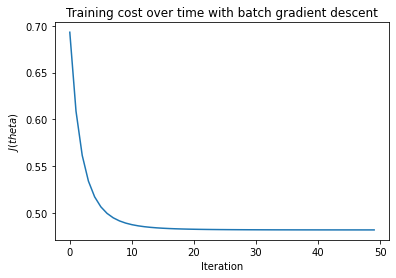

In [15]:
alpha = 1
num_iters = 50
theta, j_history = train(X_train, y_train, theta_initial, alpha, num_iters)

print("Theta optimized:", theta)
print("Cost with optimized theta:", j_history[-1])

plt.plot(j_history)
plt.xlabel("Iteration")
plt.ylabel("$J(theta)$")
plt.title("Training cost over time with batch gradient descent")

plt.show()

In [16]:
def r_squared(y, y_pred):
    return 1 - np.square(y - y_pred).sum() / np.square(y - y.mean()).sum()

y_test_pred_soft = h(X_test, theta)
y_test_pred_hard = (y_test_pred_soft > 0.5).astype(int)

test_rsq_soft = r_squared(y_test, y_test_pred_soft)
test_rsq_hard = r_squared(y_test, y_test_pred_hard)
test_acc = (y_test_pred_hard == y_test).astype(int).sum() / y_test.shape[0]

print('Got test set soft R^2 %0.4f, hard R^2 %0.4f, accuracy %0.2f' % (test_rsq_soft, test_rsq_hard, test_acc))

Got test set soft R^2 0.3348, hard R^2 0.1802, accuracy 0.83


The cost that I found is 0.48 for this data after cleaning and filling in the missing data and I got a test accuracy of 0.83 which is relatively good. The number of iterations used is 50 which made the training process extremely fast. I learnt that there are many ways we can fill in the data. The one thing that I didn't do when filling in  the data was filling it in in a random way. Even though I used the mean to determine the values to fill, not randomizing the filling process may have manipulated the data. 